In [1]:
%pylab inline
from app.analysis import Quote
quote = Quote(Quote.screen_funds('Bonds') + ['AGG', 'BND', 'BNDX', 'BIV', 'SCHZ'], 126, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
from 2019-01-29 to 2019-07-29 - 73


In [2]:
stats = quote.statistics()
stats = stats[(stats['shrp'] > 0) & (stats['std'] > 0.01)]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

66


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
VCLT,122,0.098959,0.177706,0.512209,13.957375,2.439522
IGLB,122,0.096840,0.174256,0.510192,13.593126,2.345816
EDV,122,0.096458,0.338683,0.261368,12.688239,4.608950
BLV,122,0.088340,0.189889,0.423425,12.057628,2.488783
TLT,122,0.076538,0.244591,0.280473,10.054139,3.084717
SPTL,122,0.076397,0.236736,0.289186,10.058224,2.930501
VGLT,122,0.076212,0.237841,0.287063,10.008985,2.936891
LQD,122,0.071504,0.120823,0.526123,9.750100,1.584890
CWB,122,0.070322,0.242713,0.257032,10.844795,6.240379


evicted FLRN 0.490 -0.302
evicted BSCJ 0.558 -0.210
evicted BSCK 0.648 -0.068
evicted IBDL 0.716 -0.147
evicted SUB 0.597 -0.378
evicted GSY 0.138 -0.125
evicted BAB 0.759 -0.460
evicted IPE 0.728 -0.205
evicted IGIB 0.773 -0.159
evicted IGOV 0.469 -0.289
evicted BNDX 0.513 -0.236
evicted SHM 0.493 -0.291
evicted CWB 0.789 -0.485
evicted VWOB 0.569 -0.097
evicted ANGL 0.011 -0.356
evicted ITM 0.793 -0.252
retry backlogs ['VGSH', 'TLT', 'SLQD', 'USIG', 'SHY', 'TIP', 'BSV', 'SPSB', 'VCSH', 'TDTT', 'SCHO', 'VMBS', 'MBB', 'AGG', 'SCHR', 'SHYG', 'IEF', 'SJNK', 'STIP', 'SPTS', 'IEI', 'VGIT', 'ISTB', 'BLV', 'LQD', 'SCHZ', 'IGSB', 'GOVT', 'BND', 'BIV', 'MUB', 'SPIB', 'VTIP', 'PZA', 'VCIT', 'TLH', 'SPTL', 'SCHP', 'IGLB', 'TFI', 'HYLB', 'EDV', 'VGLT', 'VCLT', 'VTEB', 'EMB', 'CMF', 'JNK'] at 0.805/-0.51 - 0.937
evicted SCHP 0.774 -0.215
evicted VGLT 0.753 -0.348
evicted VCIT 0.572 -0.162
evicted EMB 0.656 -0.080
evicted HYLB 0.033 -0.364
retry backlogs ['TLT', 'TDTT', 'SPSB', 'SJNK', 'SCHR', 'IEI

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,122.0,0.048004,0.045160,-0.059675,0.020772,0.040287,0.070686,0.183682,0.887224,6.216257,0.348891
HYD,122.0,0.048657,0.046242,-0.066275,0.020824,0.043302,0.071585,0.185648,0.880592,6.287677,0.409065
TFI,122.0,0.043804,0.050862,-0.094266,0.012206,0.041492,0.076145,0.187656,0.705209,5.758637,0.490732


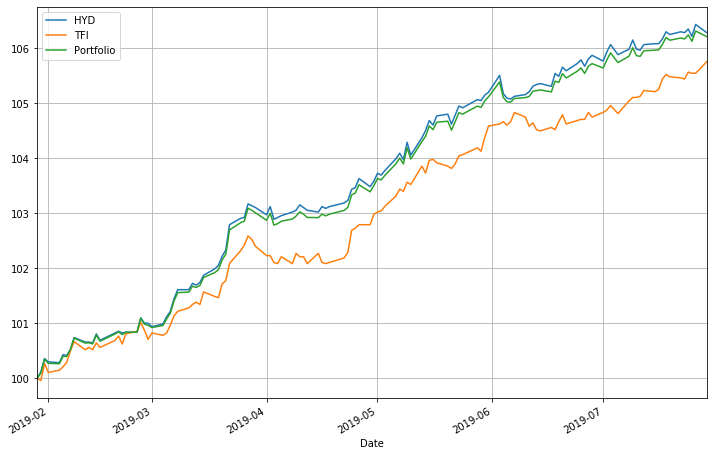

In [3]:
bounds = .04, .06
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(max_count=2, backlogs_pos_threshold=.8, _lambda=2, bounds=bounds)
quote.setup_mask(['HYD', 'VTEB'])
sd.update(quote.optimize_portfolio(max_count=2, _lambda=2, bounds=bounds))
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(max_count=2, _lambda=2, bounds=bounds))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,122.0,0.047004,0.043840,-0.054572,0.020906,0.041281,0.069205,0.180447,0.891141,6.059128,0.332745
HYD,122.0,0.048657,0.046242,-0.066275,0.020824,0.043302,0.071585,0.185648,0.880592,6.287677,0.409065
VTEB,122.0,0.042277,0.043023,-0.063010,0.015181,0.035124,0.065845,0.165537,0.798185,5.408642,0.333721


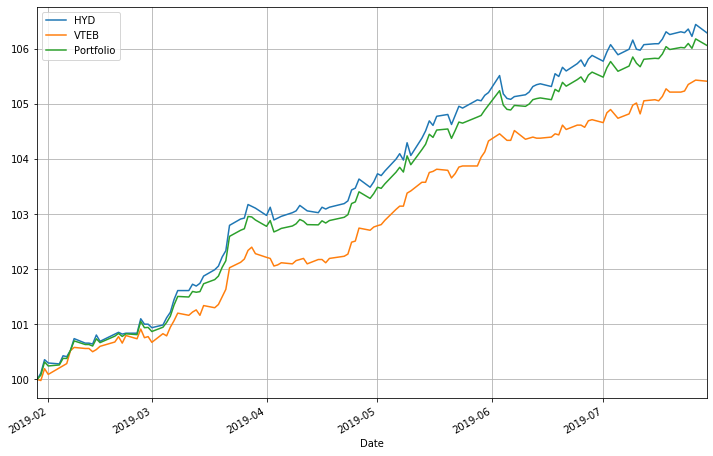

In [4]:
quote.setup_mask(['HYD', 'VTEB'])
quote.graph({'HYD': 0.74, 'VTEB': 0.26})